# Give Me Some Credit

Improving the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years. Challenge at https://www.kaggle.com/c/GiveMeSomeCredit.

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split

In [33]:
def train_val_test_split(df, test_size=0.3, val_size=0.2):
    model_df, test_df = train_test_split(df, test_size=test_size)
    train_df, val_df = train_test_split(model_df, test_size=val_size)
    
    print("Shapes: train {}, validation {}, test {}".format(train_df.shape,
                                                            val_df.shape,
                                                            test_df.shape))
    
    return(model_df.copy(), train_df.copy(), val_df.copy(), test_df.copy())

In [34]:
data_df = pd.read_csv('data/cs-training.csv',
                      dtype={'SeriousDlqin2yrs': np.int8,
                             'age': np.int8,
                             'NumberOfTime30-59DaysPastDueNotWorse': np.int8,
                             'NumberOfTime60-89DaysPastDueNotWorse': np.int8,
                             'NumberOfTimes90DaysLate': np.int8,
                             'NumberOfOpenCreditLinesAndLoans': np.int8,
                             'NumberRealEstateLoansOrLines': np.int64})

data_df.drop(['Unnamed: 0'], axis = 1, inplace=True)

model_df, train_df, val_df, test_df = train_val_test_split(data_df)

Shapes: train (84000, 11), validation (21000, 11), test (45000, 11)


In [6]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105000 entries, 41125 to 112886
Data columns (total 11 columns):
SeriousDlqin2yrs                        105000 non-null int8
RevolvingUtilizationOfUnsecuredLines    105000 non-null float64
age                                     105000 non-null int8
NumberOfTime30-59DaysPastDueNotWorse    105000 non-null int8
DebtRatio                               105000 non-null float64
MonthlyIncome                           84300 non-null float64
NumberOfOpenCreditLinesAndLoans         105000 non-null int8
NumberOfTimes90DaysLate                 105000 non-null int8
NumberRealEstateLoansOrLines            105000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    105000 non-null int8
NumberOfDependents                      102241 non-null float64
dtypes: float64(4), int64(1), int8(6)
memory usage: 5.4 MB


In [7]:
model_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,8.430000e+04,105000.000000,105000.000000,105000.000000,105000.000000,102241.000000
mean,0.066810,6.304066,52.292886,0.419048,349.145311,6.690256e+03,8.462571,0.263190,1.020590,0.238543,0.757387
std,0.249693,267.399691,14.773345,4.168404,2050.935914,1.493614e+04,5.158486,4.144082,1.141823,4.130243,1.113752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029554,41.000000,0.000000,0.174537,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.153460,52.000000,0.000000,0.366368,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.558281,63.000000,0.000000,0.861240,8.250000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## Default rate (of train base)

In [118]:
def bar_plot_rates(rates, posplot=111, title=''):
    ax = plt.subplot(posplot)

    sns.barplot(x=rates.index,
                y=rates.values)
    ax.set_xlabel('Default')
    ax.set_ylabel('rate')
    ax.set_title(title)

    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

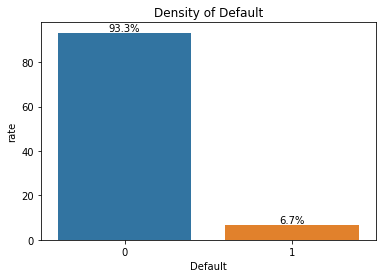

In [119]:
default_rate = 100. * model_df['SeriousDlqin2yrs'].value_counts() / model_df.shape[0]

bar_plot_rates(default_rate, title='Density of Default')
plt.show()

# Missing data analysis

In [9]:
import missingno as msno

In [10]:
model_df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           20700
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2759
dtype: int64

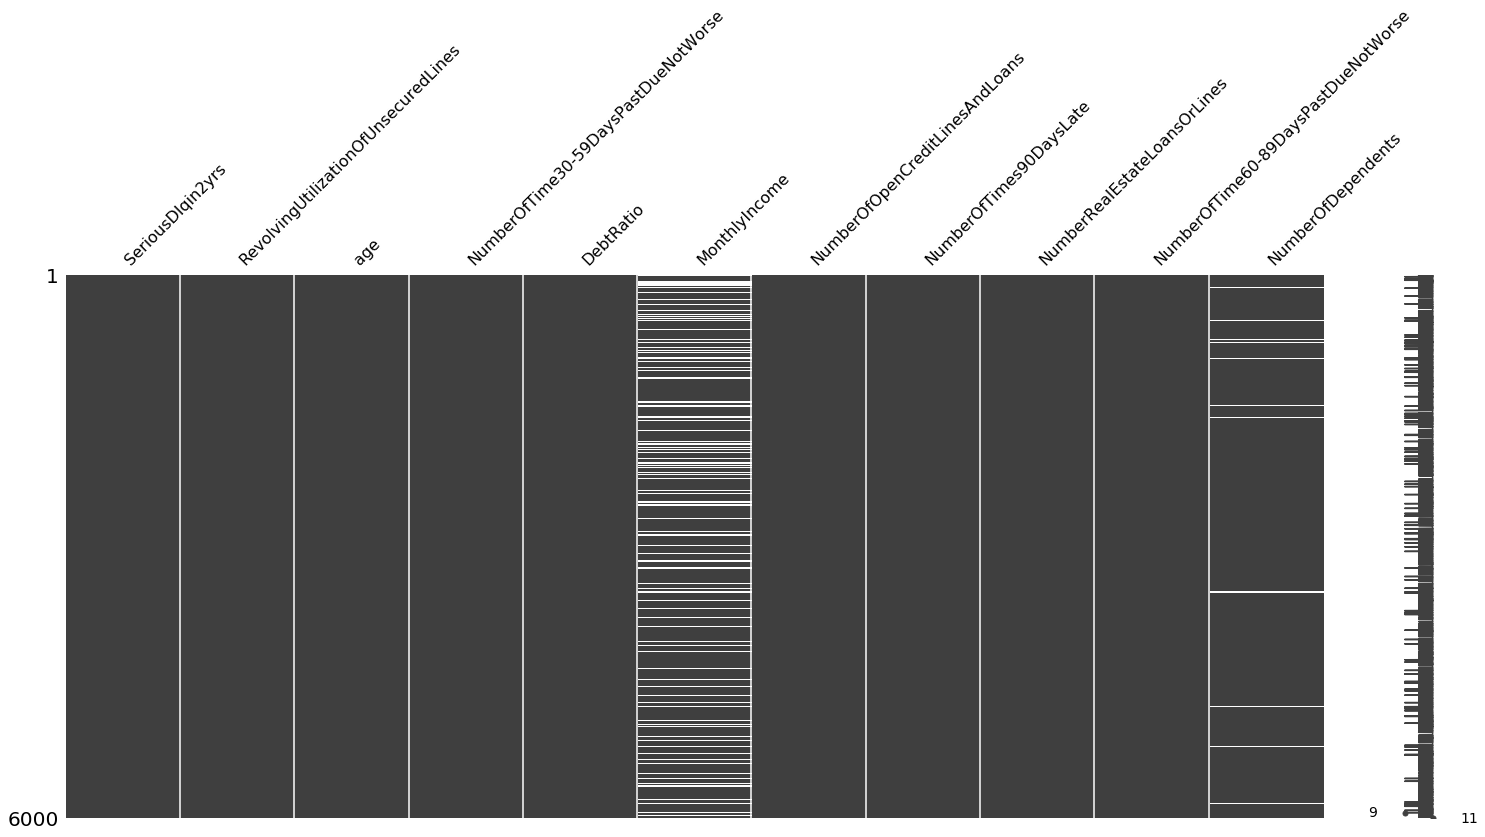

In [11]:
msno.matrix(model_df.groupby('SeriousDlqin2yrs').apply(lambda x: x.sample(n=3000)))

# Features exploration

### Age

In [12]:
model_df['age'].describe()

count    105000.000000
mean         52.292886
std          14.773345
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

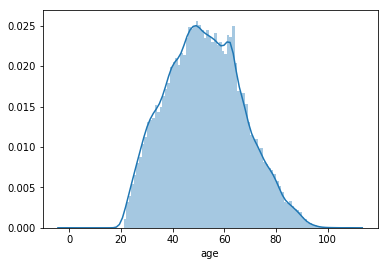

In [13]:
sns.distplot(model_df['age'], np.ptp(model_df['age']))
plt.show()

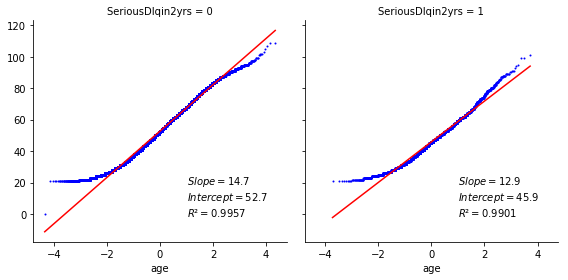

In [14]:
def qqplot_normal(x, **kwargs):
    ax = plt.gca()
    xr = sp.stats.probplot(x, plot=ax, fit=True)
    
    ax.get_lines()[0].set_markersize(1.0)
    ax.text(1, 0, '$Slope = {:.3}$\n$Intercept = {:.3}$\n$R² = {:.4}$'.format(*xr[1]))
    
g = sns.FacetGrid(model_df, col="SeriousDlqin2yrs", size=4)
g.map(qqplot_normal, "age")
plt.show()

Age **follows a normal distribution** (maybe with some outliers at the tails).

So, let's explore the outliers of this features..

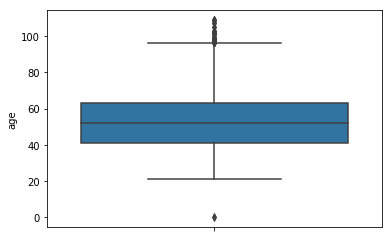

In [15]:
sns.boxplot(model_df['age'], orient='v')
plt.show()

Using IQR to detect outliers...

In [16]:
Q1 = model_df['age'].quantile(1/4.)
Q3 = model_df['age'].quantile(3/4.)
IQR = Q3 - Q1

eta = 1.5
lower_bound = Q1 - eta * IQR
upper_bound = Q3 + eta * IQR
"bounds: ({}, {})".format(lower_bound, upper_bound)

'bounds: (8.0, 96.0)'

In [17]:
train_df.loc[model_df['age'] > upper_bound, 'age'].value_counts()

97     9
99     6
102    3
98     3
109    1
107    1
105    1
101    1
Name: age, dtype: int64

Or, I can be more conservative using a small quantile of 0.9999 as upper bound...

In [18]:
conservative_upper_bound = model_df['age'].quantile(0.9999)
conservative_upper_bound

100.0001999999804

In [19]:
train_df.loc[model_df['age'] > conservative_upper_bound, 'age'].value_counts()

102    3
101    1
107    1
109    1
105    1
Name: age, dtype: int64

Finally, let's see there is some correlation between age and default..

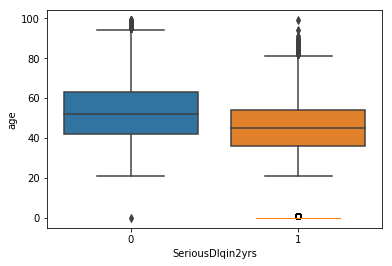

In [54]:
sns.boxplot('SeriousDlqin2yrs', 'age', data=model_df[model_df['age'] <= conservative_upper_bound])
plt.show()

**Conclusions:**
-  No missing values;
-  Follows a Normal distribution;
-  May have some outliers (> 96 or > 99);

## NumberOfDependents

In [21]:
model_df['NumberOfDependents'].describe()

count    102241.000000
mean          0.757387
std           1.113752
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [22]:
model_df['NumberOfDependents'].isnull().sum(), model_df['NumberOfDependents'].isnull().sum() / model_df['NumberOfDependents'].shape[0]

(2759, 0.026276190476190477)

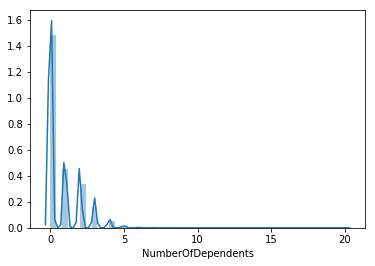

In [23]:
sns.distplot(model_df['NumberOfDependents'].dropna())
plt.show()

**Conclusions:**
-  2.5% of missing values;
-  May fill NAs = 0;

## RevolvingUtilizationOfUnsecuredLines

In [24]:
model_df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    105000.000000
mean          6.304066
std         267.399691
min           0.000000
25%           0.029554
50%           0.153460
75%           0.558281
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [25]:
model_df['RevolvingUtilizationOfUnsecuredLines'].isnull().sum()

0

The feature RevolvingUtilizationOfUnsecuredLines is **a percentage**, so let's study if when higher than 1 brings some predictive information...

In [126]:
(model_df['RevolvingUtilizationOfUnsecuredLines'] > 1).sum()

2355

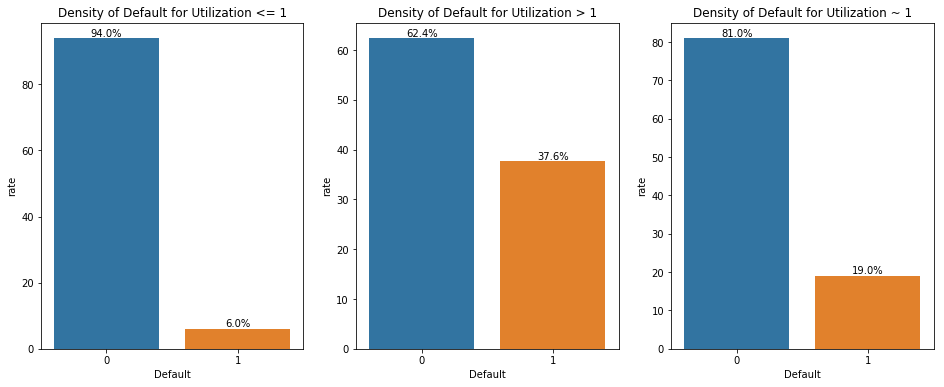

In [148]:
plt.figure(figsize=(16, 6))

tmp_df = model_df[model_df['RevolvingUtilizationOfUnsecuredLines'] <= 1]['SeriousDlqin2yrs']
default_rate = 100. * tmp_df.value_counts() / tmp_df.shape[0]
bar_plot_rates(default_rate, 131, title='Density of Default for Utilization <= 1')

tmp_df = model_df[model_df['RevolvingUtilizationOfUnsecuredLines'] > 1]['SeriousDlqin2yrs']
default_rate = 100. * tmp_df.value_counts() / tmp_df.shape[0]
bar_plot_rates(default_rate, 132, title='Density of Default for Utilization > 1')

tmp_df = model_df[np.isclose(model_df['RevolvingUtilizationOfUnsecuredLines'], 1)]['SeriousDlqin2yrs']
default_rate = 100. * tmp_df.value_counts() / tmp_df.shape[0]
bar_plot_rates(default_rate, 133, title='Density of Default for Utilization ~ 1')

plt.show()

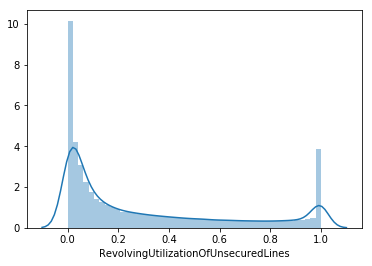

In [145]:
sns.distplot(model_df[model_df['RevolvingUtilizationOfUnsecuredLines'] <= 1]['RevolvingUtilizationOfUnsecuredLines'])
plt.show()

** Conclusion:**
-  No missing values;
-  Higher values than 1 brings some predictive information, so let's transform then to something close to 1.

## NumberOfOpenCreditLinesAndLoans

In [150]:
model_df['NumberOfOpenCreditLinesAndLoans'].describe()

count    105000.000000
mean          8.461762
std           5.159713
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

In [152]:
model_df['NumberOfOpenCreditLinesAndLoans'].isnull().sum()

0

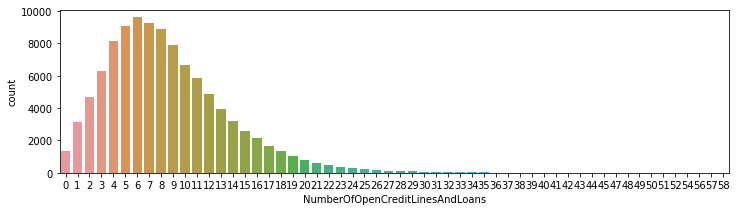

In [179]:
fig, ax = plt.subplots(figsize=(12, 3))
sns.countplot(model_df['NumberOfOpenCreditLinesAndLoans'])
plt.show()

It seems it have a long tail...

In [188]:
model_df['NumberOfOpenCreditLinesAndLoans'].value_counts(sort=False).tail(10)

47    2
48    6
49    3
50    2
51    1
52    3
54    4
56    2
57    2
58    1
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64

** Conclusion:**
-  No missing values;
-  It is OK.

## NumberRealEstateLoansOrLines

In [157]:
model_df['NumberRealEstateLoansOrLines'].describe()

count    105000.000000
mean          1.016867
std           1.129156
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

In [158]:
model_df['NumberRealEstateLoansOrLines'].isnull().sum()

0

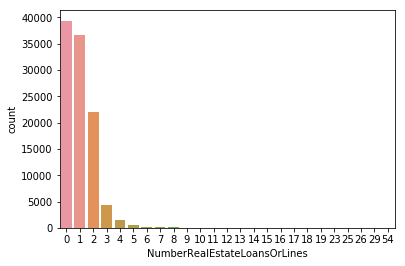

In [176]:
sns.countplot(model_df['NumberRealEstateLoansOrLines'])
plt.show()

In [187]:
model_df['NumberRealEstateLoansOrLines'].value_counts(sort=False)

0     39370
1     36617
2     22096
3      4375
4      1509
5       483
6       229
7       114
8        63
9        49
10       25
11       20
12       14
13        9
14        7
15        6
16        2
17        2
18        2
19        1
23        2
25        2
26        1
29        1
54        1
Name: NumberRealEstateLoansOrLines, dtype: int64

** Conclusion:**
-  No missing values;
-  Just drop values NumberRealEstateLoansOrLines > 26.

## NumberOfTime30–59DaysPastDueNotWorse

In [165]:
model_df['NumberOfTime30-59DaysPastDueNotWorse'].describe()

count    105000.000000
mean          0.427162
std           4.242792
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: float64

In [166]:
model_df['NumberOfTime30-59DaysPastDueNotWorse'].isnull().sum()

0

In [186]:
model_df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts(sort=False)

0     88075
1     11344
2      3208
3      1225
4       538
5       249
6       104
7        38
8        16
9         7
10        1
12        1
13        1
96        5
98      188
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

The values 96 and 98 seems very unusual... Let's see if those 'flags' show something on the data

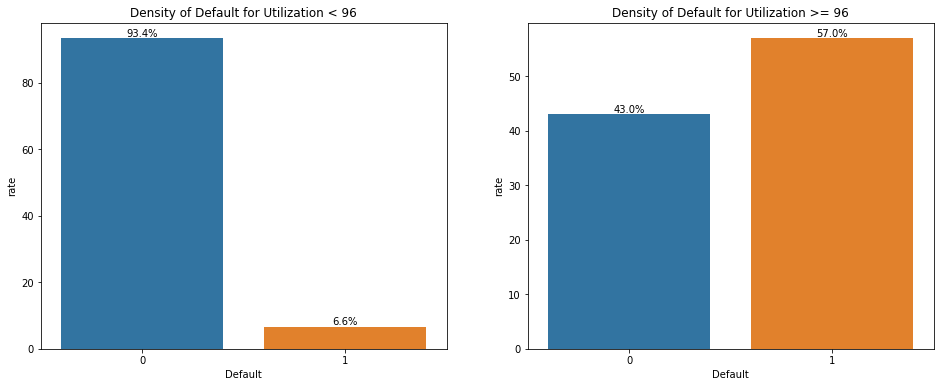

In [193]:
plt.figure(figsize=(16, 6))

tmp_df = model_df[model_df['NumberOfTime30-59DaysPastDueNotWorse'] < 96]['SeriousDlqin2yrs']
default_rate = 100. * tmp_df.value_counts() / tmp_df.shape[0]
bar_plot_rates(default_rate, 121, title='Density of Default for Utilization < 96')

tmp_df = model_df[model_df['NumberOfTime30-59DaysPastDueNotWorse'] >= 96]['SeriousDlqin2yrs']
default_rate = 100. * tmp_df.value_counts() / tmp_df.shape[0]
bar_plot_rates(default_rate, 122, title='Density of Default for Utilization >= 96')

plt.show()

Let's see the data distribution without those values

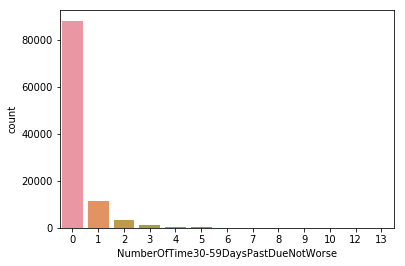

In [181]:
sns.countplot(model_df[model_df['NumberOfTime30-59DaysPastDueNotWorse'] < 96]['NumberOfTime30-59DaysPastDueNotWorse'])
plt.show()

** Conclusion:**
-  No missing values;
-  Flags 96 and 98 bring some predictive information.

## NumberRealEstateLoansOrLines

In [182]:
model_df['NumberRealEstateLoansOrLines'].describe()

count    105000.000000
mean          1.016867
std           1.129156
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

In [183]:
model_df['NumberRealEstateLoansOrLines'].isnull().sum()

0

In [185]:
model_df['NumberRealEstateLoansOrLines'].value_counts(sort=False)

0     39370
1     36617
2     22096
3      4375
4      1509
5       483
6       229
7       114
8        63
9        49
10       25
11       20
12       14
13        9
14        7
15        6
16        2
17        2
18        2
19        1
23        2
25        2
26        1
29        1
54        1
Name: NumberRealEstateLoansOrLines, dtype: int64

** Conclusion:**
-  No missing values;
-  Just drop values NumberRealEstateLoansOrLines > 26.